# <center>Assignment 2</center>
## <center>By Musa Rasheed</center>


# Question 1
Two gamblers decided to play a game involving rolling a *fair* die. Player $A$ agreed to pay Player $B$ $\$10$ as an “entry fee” to play. The game consists of Player $A$ rolling a die until he rolls an $1$ for the first time. An example of a possible sequence of rolls in this game is ${(2, 6, 3, 5, 1)}$, with the number of rolls $N = 5$. Assume the rolls are independent

### A) Player $A$ wins the game if it takes at least 3 rolls for the first 1 to show up. Find out the probability that player A wins one round of the game.(3 marks)

This is a classic geometric distribution problem. Since this is a fair die, the probability of getting a success (getting a 1) would be 1 in 6 or $p=\frac{1}{6}=0.1\bar{6}$

$$
X \text{~} Geo(0.1666...)
$$

Now we have to find the probability of winning the first round by delaying the success until 3 or more. i.e. $P(X\geq 3)$ but it could take infinite roles to get a 1, so instead I'll find $1-P(X<3)$

$$
F(x)=P(X\leq x)=1−(1−p)^x
$$
In this case, $x = 2$

In [1]:
p = 1/6
x = 2

ans = 1-(1-p)^x
paste("The probability of player A winning 1 round is", round(1-ans,6)*100,'%')

[1] "The probability of player A winning 1 round is 69.4444 %"

### B) For each round of the game, if Player A wins according to the condition in part (a), then he gets $\$30$ from Player B. Find the expected value of Player A’s profit. Is this game a good deal for Player A? Briefly explain your answer. (3 marks)

On average, Player A has a 69\% chance of winning a game. If he wins (which 69\% of the time he does) he wins 20 dollars (30 - 10 for entry fee).  If he loses (which he has a 31\% chance of doing), he lost 10 dollars. Just from this number alone he seems to be winning. But how much on average?

In [2]:
win = 1-ans
lose = 1-win

winnings = win*20 + lose*-10
print(paste('$',winnings))

[1] "$ 10.8333333333333"


his expected winnings on average is $\$10.83$ so the game is a pretty sweet deal, although a bit shady. 

### C) Player A decides to play the game for 100 rounds. Find the expectation and variance of the number of games that player A wins according to the condition in part (a). (4 marks)

This seems like a binomial problem since we are given a number of trials. 

The mean number of times he will win is $E(X)=np$:

In [3]:
n=100
p = win
expectation = n*p
expectation

[1] 69.44444

And the variance is calculated via $np(1-p)$

In [4]:
variance = n*p*(1-p)
variance

[1] 21.21914

# Question 2
The number of patients get tested at a COVID-19 drive through test site follows a Poisson process with parameter $λ=4$ per minute. Suppose the probability that a patient is tested positive for COVID is $p=0.9$

### A) Find the probability that no patients get tested in 30 seconds
$X_1\text{~}Poisson(4)$ where $X_1$ means 1 minute. $\therefore X_t \text{~}Poisson(4t)$. So for a 30 second interval (or half a minute) then $X_{0.5}\text{~}Poisson(4*0.5)$. 

So what is the probability that we get 0 tests in 30 seconds?

$$P(X=x)=\frac{λ^x e^{−λ}}{x!}$$

In this case, x=0

In [5]:
rate = 4 * 0.5
x = 0

P0 = rate^(x)*exp(-rate) / (factorial(x))

paste("The probability of getting 0 patients in 30 seconds is ",round(P0,4))

[1] "The probability of getting 0 patients in 30 seconds is  0.1353"

### B) Find the distribution of the number of patients that are tested positive in $l$ minutes. (5 marks)

We have to make a new distribution that involves the number of people being tested and the probability of getting a positive test. Since it wants the number of positive patients in $l$ minutes (a specific period of time) it wants another poisson distribution. We could find the PDF of such a distribution like so:

Consider the poisson distribution:
$$
X_{t}\text{~}Poisson(4t)
$$

A patient is found to be positive 90 percent of the time, so: 

$$
X_{l}\text{~}Poisson((4*0.9)l)
$$

so the actual distribution is:

$$
X_{l}\text{~}Poisson(3.6l)
$$

We just need to sum all the integers up to get teh cumulative denisity function: 


$$
P(X=i)=\frac{(3.6l)^i e^{−3.6l}}{i!}
$$

### C)  Find the probability that the first patient is tested positive shows up at least 1 minute after the test center opens. (3 marks)

$$
P(X\geq 1) = 1 - P(X > 1) = 1 - P(X=0)
$$

Given that it is 1 minute, $l$ must be 1.

In [6]:
rate = 3.6
i = 0

p = ((rate^i)*exp(-rate)) / factorial(i)
print(paste("the probability is ",round(1-p,4)*100,'%', sep = ''))

[1] "the probability is 97.27%"


# Question 3
The expected grades of two independent STAT courses (A and B, say) are 86 and 82. The respective standard deviations are 5 and 7. Let $\bar{X}$ and $\bar{Y}$ be the sample average grades of 38 students of course A and 32 students of course B, respectively.

### A) What is the approximate distribution of $\bar{X}$? Of $\bar{Y}$? (3 mark)

Each one of the 38 and 32 students are going to act as a random variable. Since all students from group A all come from the same normal distribution, and because the sample size is sufficiently large $(n\geq20)$ then CLT can be applied to this scenario and the approximate distribution for group A would be: 

$A\text{~} N(86, \frac{5^2}{38})$

The same logic is applied to group B: 

$B\text{~} N(82, \frac{7^2}{32})$

### B) What is the approximate distribution of $\bar{X} - \bar{Y}$ ? Why? (3 mark)

We can simply take the difference of these sums. They act approximatley like random variables who vary normally, so this is valid: 

$$
\mu = \mu_A - \mu_B = 86-82=4\\
\sigma^2 = \sigma^2_A + \sigma^2_B = \frac{5^2}{38} + \frac{7^2}{32}\approx 2.1891
$$

### C) Calculate (approximately) P(|X¯ − Y¯ | < 1). (4 mark)

Since the absolute value is applied to the normal distribution, it has been folded in half, making any values less than 1 invalid: 

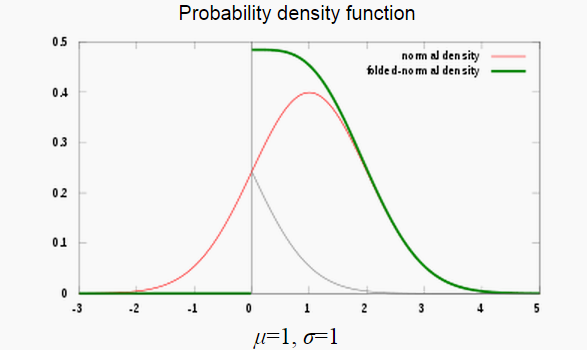

So I'll find $P(|\bar{X} − \bar{Y} | < 1) -P(|\bar{X} − \bar{Y} | < 0)$

In [7]:
sigma = (5^2)/38 + (7^2)/32

less1 = pnorm(1, mean = 4, sd = sigma)
less0 = pnorm(0, mean = 4, sd = sigma)
less1 - less0

[1] 0.05144628

# Question 4
Mechanics agree that the chain on a bicycle should be replaced after covering an average of 3000 miles. StakRide is a new bicycle manufacturing company and it wants to check if the chains it produces for bicycles have a longer life span than the existing average. The lead mechanic randomly selects 25 of the new bicycles and test runs them. The resulting sample mean and standard deviation are 3050 miles and 85 miles, respectively.

### A)  What hypothesis should be tested to determine whether the life span of StakRide bicycle chains is longer than the known average? (3 marks)

$H_0:μ_s≤μ_{avg}~~~~vs~~~~H_a:  μ_s>μ_{avg}$,  One tail test (Upper tail test)

In this case, $\mu_{avg}$ is the current mean, and $\mu_{s}$ is the StakRide sampled mean. 

### b) Assuming that the life span of the bicycle chains is approximately normal, what test statistic would you use to test the hypotheses in part(a)? What is the value of the test statistic for this data? (3 marks)

Since it is a sampled variance, I would use the T-distribution value as the test statistic. The formula being: 
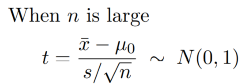

In [8]:
n = 25
df = n-1
xbar = 3050
mu0 = 3000
s = 85

t = (xbar - mu0) / (s/sqrt(n))
t

[1] 2.941176

### c) What conclusion would you reach for a significance level of 0.05. (4 marks)
First, let's look at the T-Table using the new signifigance level and the degrees of freedom:

In [9]:
qt(0.05,df, lower.tail = FALSE)

[1] 1.710882

Given that this is WELL within the rejection region, we have to conclude that we can not reject the null. More specifically, we do not have enough evidence to reject the null.

This does make sense, because the standard deviation (85) is more than big enough to explain a mere 50 mile difference.